# Proyecto Final - Sofía Carla Fraga, 2023

## Dataset: Diagnóstico Diabetes
### 1. Introducción

###### La enfermedad de Diabetes es de las más comunes dentro de las enfermedades crónicas, afectando a casi el 13% de la población mundial y generando miles de muertes todos los años, en los casos más extremos. La gran mayoría de alimentos que consumimos tiene glucosa (azúcar) y el cuerpo la transforma en energía procesándola a través de la insulina (hormona generada por el páncreas). Es aquí donde la Diabetes entra en juego ya que las personas que sufren de esta enfermedad no producen dicha hormona o sí lo hacen pero su cuerpo no la utiliza adecuadamente y esto genera un aumento en los niveles de azúcar en sangre, lo que con el tiempo puede generar problemas graves de salud como enfermedades del corazón, pérdida de la visión e incluso de extremidades y afectar gravemente los riñones. Si bien no existe una cura para la Diabetes, en muchos casos la misma puede ser reversible de forma natural con pérdida de peso y una dieta sana y, en casos más serios, ser manejada con medicamentos.

###### El Dataset bajo análisis posee información recopilada por el Sistema de Vigilancia de Factores de Riesgo del Comportamiento (SVFRC), el cual realiza encuestas telefónicas relacionadas con la salud para que luego la Centro de Control y Prevención de Enfermedades (CDC) tenga un vistazo general de la situación de salud nacional de Estados Unidos. El objetivo del presente trabajo será utilizar dichos datos para crear un modelo que, basado en las distintas variables relacionadas con esta enfermedad, pueda predecir y/o detectar rápidamente la misma para evitar que esta llegue a sus peores consecuencias en las personas.

### 2. Preparación del Dataset

###### Antes de comenzar con el anáisis y el armado del modelo es impresindible contar con las herramientas que vamos a necesitar para el mismo. En primer lugar, se importarán las librerías Pandas y Numpy:

In [334]:
import pandas as pd

In [335]:
import numpy as np

In [336]:
import math as mt

###### En segundo lugar, se importará el archivo CSV utilizando la librería Pandas y se mostrarán 5 registros para verificar cómo se visualiza el archivo:

In [337]:
Diabetes = pd.read_csv("Diabetes parameters.csv",delimiter=";")
Diabetes.tail(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
287253,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0
287254,0.0,1.0,0.0,1.0,39.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,4.0
287255,0.0,0.0,0.0,1.0,35.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,20.0,0.0,0.0,1.0,1.0,6.0,5.0
287256,0.0,1.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,12.0,6.0,6.0
287257,0.0,0.0,1.0,0.0,19.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,5.0,1.0,0.0,10.0,3.0,2.0


###### Una vez que se verifica que se ha importado el archivo correctamente, es de suma importancia conocer las proporciones del mismo, esto es, la forma, el nombre y tipo de dato de las columnas, si existen datos nulos, el tipo de dato de cada columna, las medidas básicas (media, desvío, conteo, mínimo, cuartiles y máximo):

In [338]:
Diabetes.shape

(287258, 22)

In [339]:
Diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [340]:
Diabetes.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [341]:
Diabetes.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [342]:
Diabetes.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,...,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.00000,287258.000000,287258.000000
mean,0.262214,0.422742,0.419142,0.962055,28.311963,0.442000,0.039567,0.091698,0.758840,0.634757,...,0.950995,0.083897,2.496508,3.168730,4.174926,0.164316,0.439695,8.00417,5.055884,6.069126
std,0.662987,0.493996,0.493420,0.191064,6.566517,0.496625,0.194940,0.288600,0.427788,0.481499,...,0.215878,0.277233,1.064207,7.389841,8.650077,0.370562,0.496351,3.05978,0.983465,2.065656
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.00000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.00000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.00000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.00000,6.000000,8.000000


###### En base a lo ejecutado hasta ahora, se puede ver que el dataset consta de:
* ######    22 columnas.
* ######    287258 filas.
* ######    Datos numéricos.
* ######    No hay datos nulos.

###### Por otro lado, las variables bajo análisis son las siguientes (cabe destacar que todas se encuentran incluidas en el análisis del Datsat ya que son de igual importancia dado que un cambio en cualquiera de ellas puede acrecentar o reducir drásticamente las probabilidades de que una persona tenga o sea propensa a tener diabetes):
* ###### **Diabetes_012:** Si la persona tiene o no diabetes. 0 = no tiene diabetes, 1 = prediebetes y 2 = diabetes. Se considera que la persona tiene "prediabetes" cuando tienen cierta dificultad con el manejo de la insulina y poseen un nivel de entre 100 y 125 mg/dl de glucosa en sangre estando en ayunas.
* ###### **HighBP:** Presión. 0 = presión normal/baja y 1 = presión alta. Se considera presión alta cuando supera los 140/90.
* ###### **HighChol:** Colesterol. 0 = colesterol normal/bajo y 1 = colesterol alto. Se considera colesterol bueno alto cuando es mayor a 35 mg/dl en el hombre y a 40 mg/dl en la mujer. Se considera colesterol malo alto cuando es mayor de 160 mg/dl.
* ###### **CholCheck:** Si la persona se ha chequeado el colesterol en los últimos años. 0 = no chequeado en 5 años y 1 = chequeado en 5 años.
* ###### **BMI:** Indice de Masa Corporal. <18,5 = muy delgado, <24,5 normal, <29,9 algo de sobrepeso, <34,9 obeso y >40 obesidad extrema.
* ###### **Smoker:** Si la persona fuma. 0 = no fuma y 1 = fuma.
* ###### **Stroke:** Si la persona tuvo algún ACV. 0 = no y 1 = sí.
* ###### **HeartDiseaseorAttack:** Si la persona tiene o tuvo algún problema de corazón o paro cardíaco. 0 = no y 1 = sí.
* ###### **PhysActivity:** Si la persona ha realizado actividad física en los últimos 30 días. 0 = no y 1 = sí.
* ###### **Fruits y Veggies:** Si la persona consume fruta diariamente. 0 = no y 1 = sí.
* ###### **HvyAlcoholConsump:** Si la persona toma más de 14 veces por semana. O = no y 1 = sí.
* ###### **AnyHealthCare:** Si la persona tiene o no cobertura médica. 0 = no y 1 = sí.
* ###### **NoDocbcCost:** Si la persona quizo ver a un médico en los últimos 12 meses y no pudo por su costo. 0 = no y 1 = sí.
* ###### **GenHealth:** Si la persona tiene alguna condición de salud. Escala de 0 a 5 donde 5 es muy bien de salud y 0 mal de salud.
* ###### **MentHlth:** Durante cuántos días, en los últimos 30 días, se sintió mal mentalmente la persona. Escala de 0 a 30.
* ###### **PhysHlth:** Durante cuántos días, en los últimos 30 días, se sintió mal físicamente la persona. Escala de 0 a 30.
* ###### **DiffWalk:** Si la persona tiene dificultades serias para caminar o trepar. 0 = no y 1 = sí.
* ###### **Sex:** Sexo. 0 = mujer y 1 = hombre.
* ###### **Education:** Último grado aprobado del colegio primario. Escala de 1 a 6.
* ###### **Age e Income:** Para la edad se utiliza un índice de 14 rangos de edad. Para los ingresos se utiliza un índice de 8 rangos de ingresos anuales. Se muestram dichos rangos en las tablas debajo:

In [343]:
Rango_edad = pd.DataFrame()


Rango_edad["Valor"] = [1,2,3,4,5,6,7,8,9,10,11,12,13]
Rango_edad["Edad"] = ["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79",">80"]


print(Rango_edad)

    Valor   Edad
0       1  18-24
1       2  25-29
2       3  30-34
3       4  35-39
4       5  40-44
5       6  45-49
6       7  50-54
7       8  55-59
8       9  60-64
9      10  65-69
10     11  70-74
11     12  75-79
12     13    >80


In [344]:
Rango_ingresos = pd.DataFrame()


Rango_ingresos["Valor"] = [1,2,3,4,5,6,7,8]
Rango_ingresos["Edad"] = [10000,18125,26250,34375,42500,50625,58750,75000]


print(Rango_ingresos)

   Valor   Edad
0      1  10000
1      2  18125
2      3  26250
3      4  34375
4      5  42500
5      6  50625
6      7  58750
7      8  75000


###### Finalmente, y a fin de emprolijar un poco la información, se reducirán los ecimales del dataset principal:

In [345]:
Diabetes1 = Diabetes.astype(int)
Diabetes1

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287253,0,0,0,1,21,1,0,0,1,1,...,1,0,1,0,0,0,1,4,6,8
287254,0,1,0,1,39,1,0,0,1,0,...,1,0,3,0,0,0,0,11,4,4
287255,0,0,0,1,35,0,0,0,1,0,...,1,0,2,20,0,0,1,1,6,5
287256,0,1,0,1,24,0,0,0,1,1,...,1,0,2,0,0,0,1,12,6,6


### 3. Desarrollo

###### En esa sección se comenzarán a analizar los datos que aporta el Dataset para obtener un vistazo gneral de la situación. Para ello, es imprescindible contar con las herramientas visuales correctas por lo que se importarán las librerías: MatplotLib y Seaborn (se utilizará el estilo Notebook).

In [346]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [347]:
mpl.style.use("seaborn-notebook")

###### Para la presente sección se utilizarán tres gráficas de cada librería, comenzando por una gráfica de barras comparativa, de la librería Matplotlib, que busca establecer la distribución de cada variable entre los casos positivos y negativos de diabetes.

###### En primer lugar, se agrupará en base a las tres condiciones de la columna Diabetes_012 que especifican si la persona tiene diabetes (valor = 2), si tiene prediabetes (valor = 1) y si no tiene diabetes (valor = 0):

In [348]:
Diabetes_categorias = Diabetes1.groupby(by="Diabetes_012").sum()
Diabetes_categorias

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0,91919,93841,236684,6861460,106369,7833,17799,192554,158857,203114,...,234880,19759,587039,731558,888723,32795,107344,1925685,1262451,1534468
1,2913,2875,4569,142285,2282,265,664,3142,2789,3561,...,4377,599,13780,20978,29399,1285,2027,42065,22157,24781
2,26604,23686,35105,1129093,18317,3268,7878,22287,20693,26736,...,33924,3742,116323,157707,281159,13121,16935,331512,167735,184156


In [349]:
Listas_diabetes = Diabetes_categorias.to_numpy().tolist()
No_diabetes = Listas_diabetes[0]
Prediabetes =Listas_diabetes[1]
Si_diabetes = Listas_diabetes[2]

In [350]:
No_diabetes_cortado =[91919,93841, 236684, 106369, 7833, 17799, 192554, 158857, 203114, 15290, 234880, 19759, 32795]
Prediabetes_cortado = [2913,2875,4569,2282,265,664,3142,2789,3561,208,4377,599,1285]
Si_diabetes_cortado = [26604,23686,35105,18317,3268,7878,22287,20693,26736,832,33924,3742,13121]

In [351]:
columnas = ('HighBP', 'HighChol', 'CholCheck', 'Smoker','Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk')

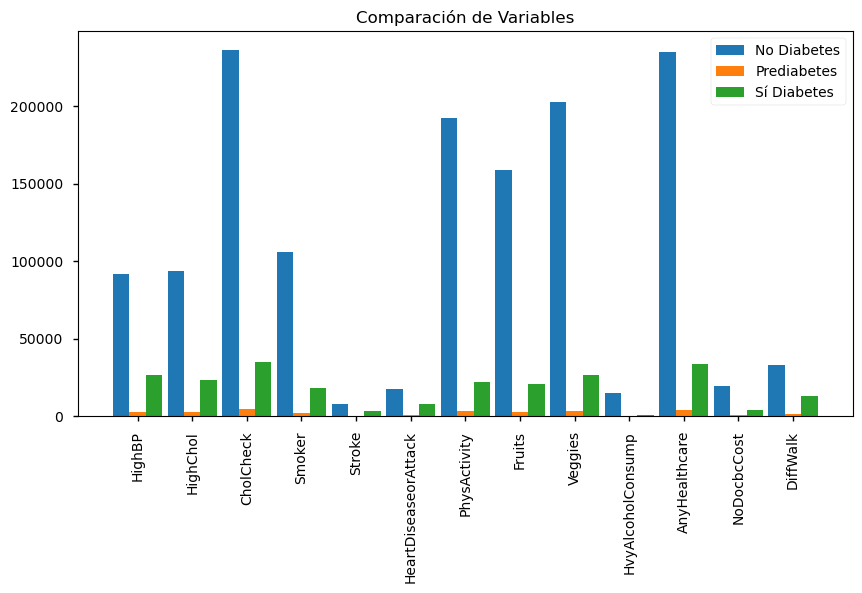

In [359]:
n = len(columnas)
x = np.arange(n)
plt1 = plt.figure(figsize=(10,5))
width = 0.3
plt.bar(x - width, No_diabetes_cortado, width=width, label='No Diabetes')
plt.bar(x, Prediabetes_cortado, width=width, label='Prediabetes')
plt.bar(x + width, Si_diabetes_cortado, width=width, label='Sí Diabetes')
plt.xticks(x, columnas)
plt.legend(loc='best')
plt.title("Comparación de Variables")
plt.xticks(rotation=90)

plt.show()
